# data processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import sys
import scipy
import functions

/home/elina/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## original dataframe 

In [3]:
df = pd.read_spss('dataframe/NBH2013_Public_Use.sav')
a=[]
for i in range(2,58):
    a.append(i)
for i in range(111,126):
    a.append(i)
df.drop(df.columns[a], axis=1, inplace=True)
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17 years old,Female,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,16 years old,Male,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
2,16 years old,Female,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
3,15 years old,Female,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
4,16 years old,Female,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0


In [4]:
df[['QN7']] = df[['QN7']].replace([2,1],[1,2])
df[['QN8']] = df[['QN8']].replace([2,1],[1,2])
df[['QN47']] = df[['QN47']].replace([2,1],[1,2])
df[['QN48']] = df[['QN48']].replace([2,1],[1,2])
df[['QN49']] = df[['QN49']].replace([2,1],[1,2])
df[['QN51']] = df[['QN51']].replace([2,1],[1,2])
df[['QN54']] = df[['QN54']].replace([2,1],[1,2])
df[['QN55']] = df[['QN55']].replace([2,1],[1,2])
df[['QN57']] = df[['QN57']].replace([2,1],[1,2])
df[['QN58']] = df[['QN58']].replace([2,1],[1,2])
df = df.replace([1,2],[2,1])
df[['Q1']] = df[['Q1']].replace(['17 years old','16 years old','15 years old','18 years old or older','13 years old','14 years old','12 years old','11 years old or younger'],
               [17,16,15,18,13,14,12,11])
df[['Q2']] = df[['Q2']].replace(['Male','Female'],[1,2])
#df[['Q3']] = df[['Q3']].replace(['Grade 10','Grade 11','Grade 12','Grade 6', 'Grade 7', 'Grade 8', 'Grade 9'],[10,11,12,6,7,8,9])
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17,2,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
1,16,1,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
2,16,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
3,15,2,1.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
4,16,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0


In [5]:
df.to_csv('dataframe/df_original.csv',index = False)

In [11]:
df = pd.read_csv('dataframe/df_original.csv')
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
1,16.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
2,16.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
3,15.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
4,16.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0


<ipython-input-6-ee8baa3f1b27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df_original = df.corr()


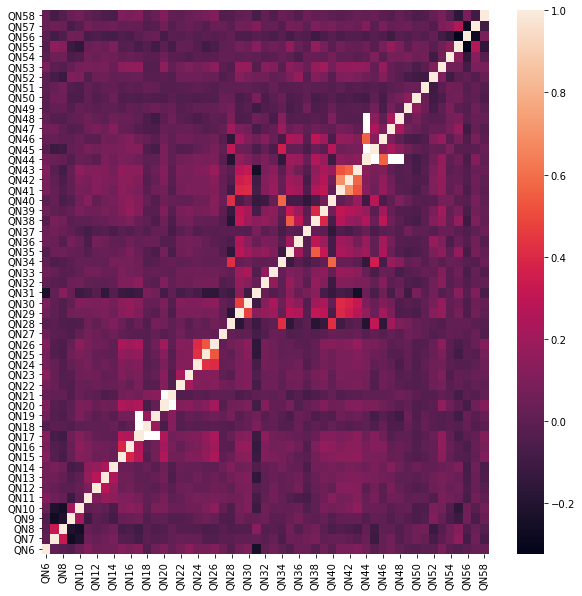

In [6]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_original = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_original)
ax.invert_yaxis()
plt.savefig("corr_original.png")

In [7]:
correlation_df_original.to_csv('correlation/df_original_corr.csv',index = False)

In [12]:
df_ori_gf = functions.gf_(df)

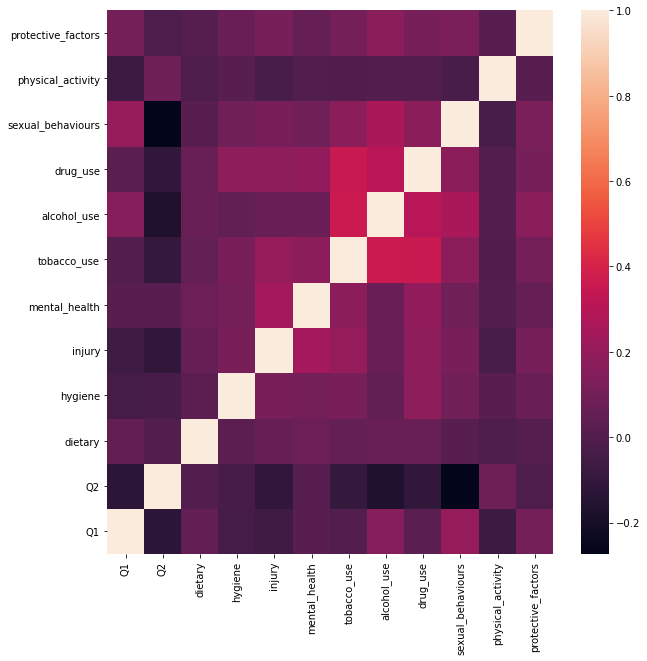

In [13]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_original_gf = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_original_gf)
ax.invert_yaxis()
plt.savefig("corr_original_gf.png")

In [14]:
correlation_df_original_gf.to_csv('correlation/df_original_corr_gf.csv',index = False)

## 0-fill dataframe 

In [2]:
df = pd.read_spss('dataframe/NBH2013_Public_Use.sav')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,qnunwtg,qnfrvgg,qnanytbg,qnpa7g,qnpe5g,qnc1g,qnc2g,weight,stratum,psu
0,17 years old,Female,Grade 10,1.70,55.0,Most of the time,3 times per day,3 times per day,3 times per day,4 days,...,2.0,1.0,2.0,2.0,2.0,NaN,NaN,47.7660,201301023.0,46.0
1,16 years old,Male,Grade 10,1.80,63.0,Never,4 times per day,NaN,2 times per day,2 days,...,2.0,NaN,2.0,2.0,1.0,NaN,NaN,44.0416,201301023.0,46.0
2,16 years old,Female,Grade 10,1.53,46.0,Never,Less than one time per day,Less than one time per day,Less than one time per day,1 day,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,47.7660,201301023.0,46.0
3,15 years old,Female,Grade 10,1.55,43.0,Never,Less than one time per day,1 time per day,NaN,1 day,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,47.7660,201301023.0,46.0
4,16 years old,Female,Grade 10,1.53,50.0,Never,Less than one time per day,1 time per day,Less than one time per day,2 days,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,47.7660,201301023.0,46.0


In [3]:
df['QN18'][df.Q18 == 'Not seriously injured'] = 0
df['QN19'][df.Q19 == 'Not seriously injured'] = 0
df['QN21'][df.Q21 == 'Not bullied'] = 0
df['QN28'][df.Q28 == 'I have never smoked cigarettes'] = 0
df['QN31'][(df.Q31 == 'I have never smoked cigarettes')|(df.Q31 == 'Did not smoke cigarettes')] = 0
df['QN34'][df.Q34 == 'Never drank alcohol'] = 0
df['QN36'][df.Q36 == 'Did not drink in past 30 days'] = 0
df['QN37'][df.Q37 == 'Did not drink in past 30 days'] = 0
df['QN40'][df.Q40 == 'I have never used drugs'] = 0
df['QN45'][df.Q45 == 'Never had sex'] = 0
df['QN47'][df.Q47 == 'Never had sex'] = 0
df['QN48'][df.Q48 == 'Never had sex'] =0

<ipython-input-3-34620911f276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QN18'][df.Q18 == 'Not seriously injured'] = 0
<ipython-input-3-34620911f276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QN19'][df.Q19 == 'Not seriously injured'] = 0
<ipython-input-3-34620911f276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QN21'][df.Q21 == 'Not bullied'] = 0
<ipython-input-3-34620911f276>:4: SettingWithCopyWarning: 


In [24]:
a=[]
for i in range(2,58):
    a.append(i)
for i in range(111,126):
    a.append(i)
df.drop(df.columns[a], axis=1, inplace=True)

In [25]:
df[['QN7']] = df[['QN7']].replace([2,1],[1,2])
df[['QN8']] = df[['QN8']].replace([2,1],[1,2])
df[['QN47']] = df[['QN47']].replace([2,1],[1,2])
df[['QN48']] = df[['QN48']].replace([2,1],[1,2])
df[['QN49']] = df[['QN49']].replace([2,1],[1,2])
df[['QN51']] = df[['QN51']].replace([2,1],[1,2])
df[['QN54']] = df[['QN54']].replace([2,1],[1,2])
df[['QN55']] = df[['QN55']].replace([2,1],[1,2])
df[['QN57']] = df[['QN57']].replace([2,1],[1,2])
df[['QN58']] = df[['QN58']].replace([2,1],[1,2])
df = df.replace([1,2],[2,1])
df[['Q1']] = df[['Q1']].replace(['17 years old','16 years old','15 years old','18 years old or older','13 years old','14 years old','12 years old','11 years old or younger'],
               [17,16,15,18,13,14,12,11])
df[['Q2']] = df[['Q2']].replace(['Male','Female'],[1,2])
#df[['Q3']] = df[['Q3']].replace(['Grade 10','Grade 11','Grade 12','Grade 6', 'Grade 7', 'Grade 8', 'Grade 9'],[10,11,12,6,7,8,9])
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17,2,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
1,16,1,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
2,16,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
3,15,2,1.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
4,16,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0


In [26]:
df.to_csv('dataframe/df_o_fill.csv',index = False)

In [27]:
df_0_fill = pd.read_csv('dataframe/df_o_fill.csv')

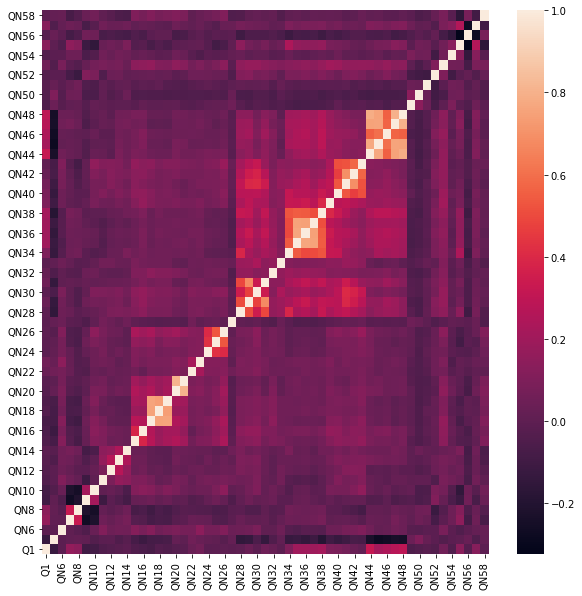

In [28]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_0fill = df_0_fill.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_0fill)
ax.invert_yaxis()
plt.savefig("corr_0fill.png")

In [29]:
correlation_df_0fill.to_csv('correlation/df_0fill_corr.csv',index = False)

In [30]:
df_0fill_gf = functions.gf_(df_0_fill)

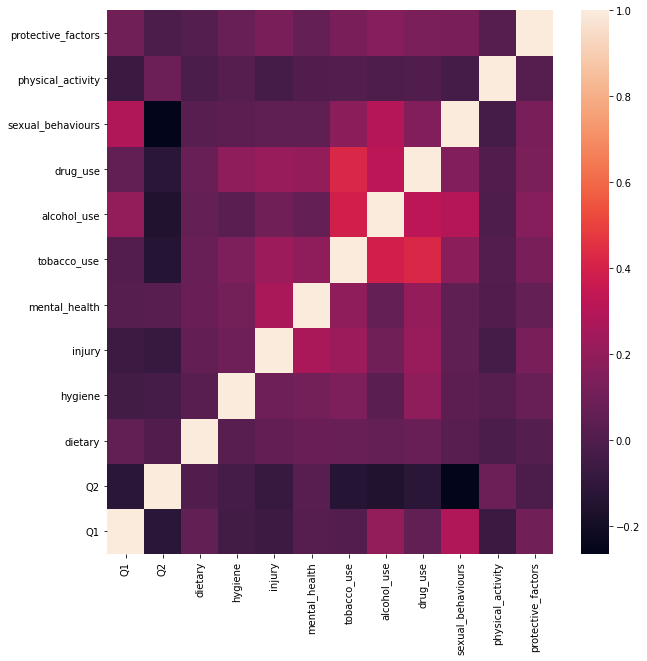

In [31]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_0fill_gf = df_0fill_gf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_0fill_gf)
ax.invert_yaxis()
plt.savefig("corr_0fill_gf.png")

In [33]:
correlation_df_0fill_gf.to_csv('correlation/df_0fill_corr_gf.csv',index = False)

In [34]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
dataset_ite = imp.transform(df)
df_ite_0fill = pd.DataFrame(dataset_ite,columns= df.columns)

/home/elina/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [35]:
df_ite_0fill.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17.0,2.0,2.0,1.0,1.000000,2.000000,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
1,16.0,1.0,1.0,1.0,1.637608,2.000000,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
2,16.0,2.0,1.0,2.0,2.000000,1.000000,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
3,15.0,2.0,1.0,2.0,2.000000,1.442411,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
4,16.0,2.0,1.0,2.0,2.000000,1.000000,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0


In [36]:
for i in df_ite_0fill.columns[2:55]:
    df_ite_0fill.loc[df_ite_0fill[i] < 0.5,i] =0
    df_ite_0fill.loc[df_ite_0fill[i] >= 1.5,i] =2
    df_ite_0fill.loc[(df_ite_0fill[i] >= 0.5) & (df_ite_0fill[i] < 1.5),i] =1
df_ite_0fill.loc[df_ite_0fill['Q1'] < 11.5,'Q1'] =11
df_ite_0fill.loc[(df_ite_0fill['Q1'] < 12.5)&(df_ite_0fill['Q1'] >= 11.5),'Q1'] =12
df_ite_0fill.loc[(df_ite_0fill['Q1'] < 13.5)&(df_ite_0fill['Q1'] >= 12.5),'Q1'] =13
df_ite_0fill.loc[(df_ite_0fill['Q1'] < 14.5)&(df_ite_0fill['Q1'] >= 13.5),'Q1'] =14
df_ite_0fill.loc[(df_ite_0fill['Q1'] < 15.5)&(df_ite_0fill['Q1'] >= 14.5),'Q1'] =15
df_ite_0fill.loc[(df_ite_0fill['Q1'] < 16.5)&(df_ite_0fill['Q1'] >= 15.5),'Q1'] =16
df_ite_0fill.loc[(df_ite_0fill['Q1'] < 17.5)&(df_ite_0fill['Q1'] >= 16.5),'Q1'] =17
df_ite_0fill.loc[df_ite_0fill['Q1'] >= 17.5,'Q1'] =18

In [37]:
df_ite_0fill.to_csv('dataframe/df_o_fill_ite.csv',index = False)